In [369]:
import numpy as np
import pylab as plt

In [370]:
plt.rcParams['figure.dpi'] = 85 # setting the figure size in jupyter notebook 

#DO NOT INCULDE THIS IN THE FINAL CODE

In [371]:
no_of_sections = 100
theeta = np.arange(0,2*np.pi,2*np.pi/no_of_sections) #diving the circle into 100 sections
a = 10 #radius of the loop

In [372]:
rx = a*np.cos(theeta) #x component of the radial vector, r'l bar
ry = a*np.sin(theeta)

In [373]:
Ix = -1*(2*np.pi/(4*np.pi*1e-7))*np.sin(theeta)*np.cos(theeta) #x component of the current at an angle of theeta, I
Iy = (2*np.pi/(4*np.pi*1e-7))*np.cos(theeta)*np.cos(theeta)

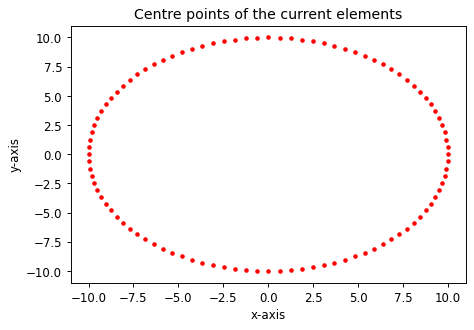

In [374]:
plt.scatter(rx,ry, c = 'red', s = 8)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Centre points of the current elements')
plt.show()

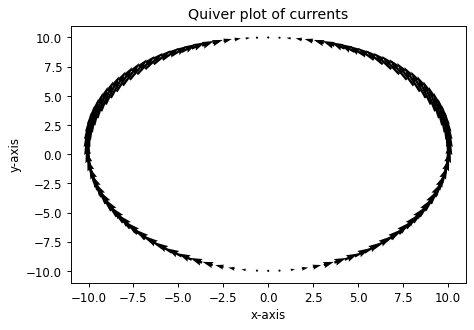

In [376]:
plt.quiver(rx,ry,Ix,Iy, color = 'black')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Quiver plot of currents')
plt.show()

In [377]:
dlx = (2*np.pi*a/no_of_sections)*(-1*np.sin(theeta)) # dl', vector of the length increments
dly = (2*np.pi*a/no_of_sections)*(np.cos(theeta))

In [378]:
x = np.linspace(0,2,3) # breaking the volume into 3x3x1000
x = x-1
y = np.linspace(0,2,3)
y = y-1
z = np.linspace(1,1000,1000)
xx,yy,zz = np.meshgrid(x,y,z)
rijk = np.array((xx,yy,zz))

In [379]:
a = np.array([0,1,2])
b = np.array([0,1,2])
c = np.zeros((2,3))
c[0,:] = a[:] * b[:]
c[1,:] = a[:] - b[:]


In [380]:
rijk.shape
rijk[1,0,2,900] 
#this gives us a 4d vector Rijk in which if we set the FIRST parameter to 0 then it will give the y-coordinate
#of the point Rijk, similarly if set it as 1 then it gives the x coordinate
#hence, we switch both of these for simpler use

-1.0

In [381]:
rijk_ = np.zeros((3,3,3,1000))
rijk_[0,:,:,:] = rijk[1,:,:,:]
rijk_[1,:,:,:] = rijk[0,:,:,:]
rijk_[2,:,:,:] = rijk[2,:,:,:]
rijk_[0,1,2,900]



#this gives us a 4d vector Rijk_ in which if we set the FIRST parameter to 0 then it will give the x-coordinate
#of the point Rijk, similarly if set it as 1 then it gives the y coordinate

0.0

In [382]:
def calc(l):
    Rijk = np.zeros((1,3,3,1000))
    Rijk[0,:,:,:] = ((rijk_[0,:,:,:]-rx[l])**2 + (rijk_[1,:,:,:]-ry[l])**2 + (rijk_[2,:,:,:])**2 )**(1/2)
    return Rijk
    
#example = calc(0)
#example[0,1,1,999]
#TEST WAS SUCCESSFULLL!!!!  

In [383]:
def A_x_l(l):
    A_x_ = np.zeros((1,3,3,1000))
    A_x_ = ( np.cos(theeta[l])* np.exp(-1*1j*0.1*calc(l))* dlx[l] )/ (calc(l))
    return A_x_

def A_y_l(l):
    A_y_ = np.zeros((1,3,3,1000))
    A_y_ = ( np.cos(theeta[l])* np.exp(-1*1j*0.1*calc(l))* dly[l] )/ (calc(l))
    return A_y_

A_x = np.zeros((1,3,3,1000))
for l in range(100):
    A_x = A_x + A_x_l(l)

A_y = np.zeros((1,3,3,1000))
for l in range(100):
    A_y = A_y + A_y_l(l)
    

In [384]:
B = np.zeros(1000)
B = (A_y[0,1,0,:] - A_x[0,0,1,:] - A_y[0,-1,0,:] + A_x[0,0,-1,:])/(4) #delta x = delta y = 1

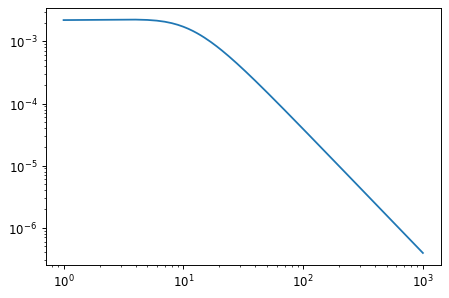

In [385]:
z = np.arange(1,1001,1)
plt.loglog(z,np.abs(B))

In [415]:
# now to fit the data into B = c*z^b
# therefore, log(B) = b*log(z) + c

A_fit = np.c_[np.log(z[100:]),np.ones(len(B)-100)]
B_fit = np.log(abs(B)[100:])
a_real,b_real = np.linalg.lstsq(A_fit, B_fit, rcond=None)[0]
print ("The fitted b,c only taking samples after the graph turns loglog is:\nb = {}, c = {}\n" .format(a_real,b_real))

A_fit = np.c_[np.log(z),np.ones(len(B))]
B_fit = np.log(abs(B))
a_no_approx,b_no_approx = np.linalg.lstsq(A_fit, B_fit, rcond=None)[0]
print ("The fitted b,c without taking samples after the graph turns loglog is:\nb = {}, c = {}" .format(a_no_approx,b_no_approx))


The fitted b,c only taking samples after the graph turns loglog is:
b = -1.9976889661943844, c = -0.9499396491165716

The fitted b,c without taking samples after the graph turns loglog is:
b = -1.865899330456934, c = -1.7587042646578306
